In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import os
import tensorflow as tf
from lib.methods import *
from lib.models import *
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image_dataset_from_directory

2022-11-25 10:44:36.577397: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-11-25 10:44:46.337186: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-11-25 10:44:46.414483: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.91GiB deviceMemoryBandwidth: 451.17GiB/s
2022-11-25 10:44:46.414939: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:81:00.0 name: NVIDIA GeForce GTX 1080 Ti computeCapability: 6.1
coreClock: 1.6705GHz coreCount: 28 deviceMemorySize: 10.92GiB deviceMemoryBandwidth: 451.17GiB/s
2022-11-25 10:44:46.414987: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic libra

# Loading SIPI Dataset

SIPI dataset was preprocessed using prepare_dataset notebook, so these three folders already contain Detritus/Non-Detritus images.

Training: 70%
Validation: 15%
Testing: 15%

In [2]:
DatasetName = '../../Detritus/Dataset-Detritus-Bubble'

train_dir = DatasetName+'/train'
validation_dir =  DatasetName+'/val'
test_dir = DatasetName+'/test'

test_all_class_dir = '../../Detritus/Dataset-Detritus-Bubble/test'
train_all_class_dir = 'Dataset-Detritus-Bubble/train'
val_all_class_dir = 'Dataset-Detritus-Bubble/val'

In [3]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

The three datasets are loaded using keras preprocessing method *image_dataset_from_directory*. Both the batch size and the image size hyperparameters where tested using different values. 

In [4]:
train_dataset = image_dataset_from_directory(train_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 38391 files belonging to 2 classes.


In [5]:
validation_dataset = image_dataset_from_directory(validation_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

test_dataset = image_dataset_from_directory(test_dir,
shuffle=True,
batch_size=BATCH_SIZE,
image_size=IMG_SIZE)

Found 8226 files belonging to 2 classes.
Found 8227 files belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(test_all_class_dir,
shuffle=False,
batch_size=BATCH_SIZE)

Found 8227 images belonging to 2 classes.


# Training

In [7]:
# Hyperparamers to be used in all models
base_learning_rate = 0.001
IMG_SHAPE = IMG_SIZE + (3,)
TRAINING_EPOCHS = 200


# Callback Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=20,
                                                mode="min",
                                               restore_best_weights=True)

reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-5, mode='min')

# Custom CNN model

Training with Data Augmentation

Training model, epochs:  200
Epoch 1/200


2022-11-25 10:44:51.083177: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-25 10:44:51.108386: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2100020000 Hz
2022-11-25 10:44:51.537717: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2022-11-25 10:44:52.021031: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8302
2022-11-25 10:44:52.550913: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-11-25 10:44:52.551720: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11


1200/1200 [==============================] - 38s 30ms/step - loss: 0.3356 - accuracy: 0.8408 - val_loss: 0.3089 - val_accuracy: 0.8489


2022-11-25 10:45:29.420483: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: .model_a/assets
Epoch 2/200
1200/1200 [==============================] - 31s 26ms/step - loss: 0.2580 - accuracy: 0.8855 - val_loss: 0.2653 - val_accuracy: 0.8852
INFO:tensorflow:Assets written to: .model_a/assets
Epoch 3/200
1200/1200 [==============================] - 36s 30ms/step - loss: 0.2361 - accuracy: 0.8985 - val_loss: 0.2418 - val_accuracy: 0.8868
INFO:tensorflow:Assets written to: .model_a/assets
Epoch 4/200
1200/1200 [==============================] - 34s 28ms/step - loss: 0.2209 - accuracy: 0.9077 - val_loss: 0.2191 - val_accuracy: 0.9132
INFO:tensorflow:Assets written to: .model_a/assets
Epoch 5/200
1200/1200 [==============================] - 32s 26ms/step - loss: 0.2084 - accuracy: 0.9139 - val_loss: 0.2275 - val_accuracy: 0.8924
Epoch 6/200
1200/1200 [==============================] - 32s 26ms/step - loss: 0.2018 - accuracy: 0.9182 - val_loss: 0.2011 - val_accuracy: 0.9283
INFO:tensorflow:Assets written to: .model_a/assets
Epoch 7/20

Epoch 49/200
1200/1200 [==============================] - 43s 35ms/step - loss: 0.1281 - accuracy: 0.9518 - val_loss: 0.1526 - val_accuracy: 0.9464
Epoch 50/200
1200/1200 [==============================] - 39s 33ms/step - loss: 0.1267 - accuracy: 0.9508 - val_loss: 0.1520 - val_accuracy: 0.9460
INFO:tensorflow:Assets written to: .model_a/assets
Epoch 51/200
1200/1200 [==============================] - 40s 33ms/step - loss: 0.1265 - accuracy: 0.9525 - val_loss: 0.1523 - val_accuracy: 0.9460
Epoch 52/200
1200/1200 [==============================] - 36s 30ms/step - loss: 0.1261 - accuracy: 0.9511 - val_loss: 0.1533 - val_accuracy: 0.9457
Epoch 53/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.1268 - accuracy: 0.9520 - val_loss: 0.1527 - val_accuracy: 0.9453
Epoch 54/200
1200/1200 [==============================] - 36s 30ms/step - loss: 0.1267 - accuracy: 0.9508 - val_loss: 0.1525 - val_accuracy: 0.9461
Epoch 55/200
1200/1200 [==============================] - 39s

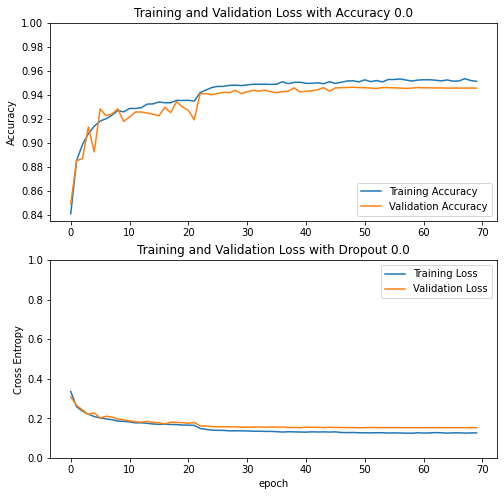

258/258 [==============================] - 5s 18ms/step - loss: 0.1400 - accuracy: 0.9477
Test accuracy : 0.9477330446243286


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.006s...
[t-SNE] Computed neighbors for 8227 samples in 2.515s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 4.644060
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.597717
[t-SNE] KL divergence after 2500 iterations: 2.092587


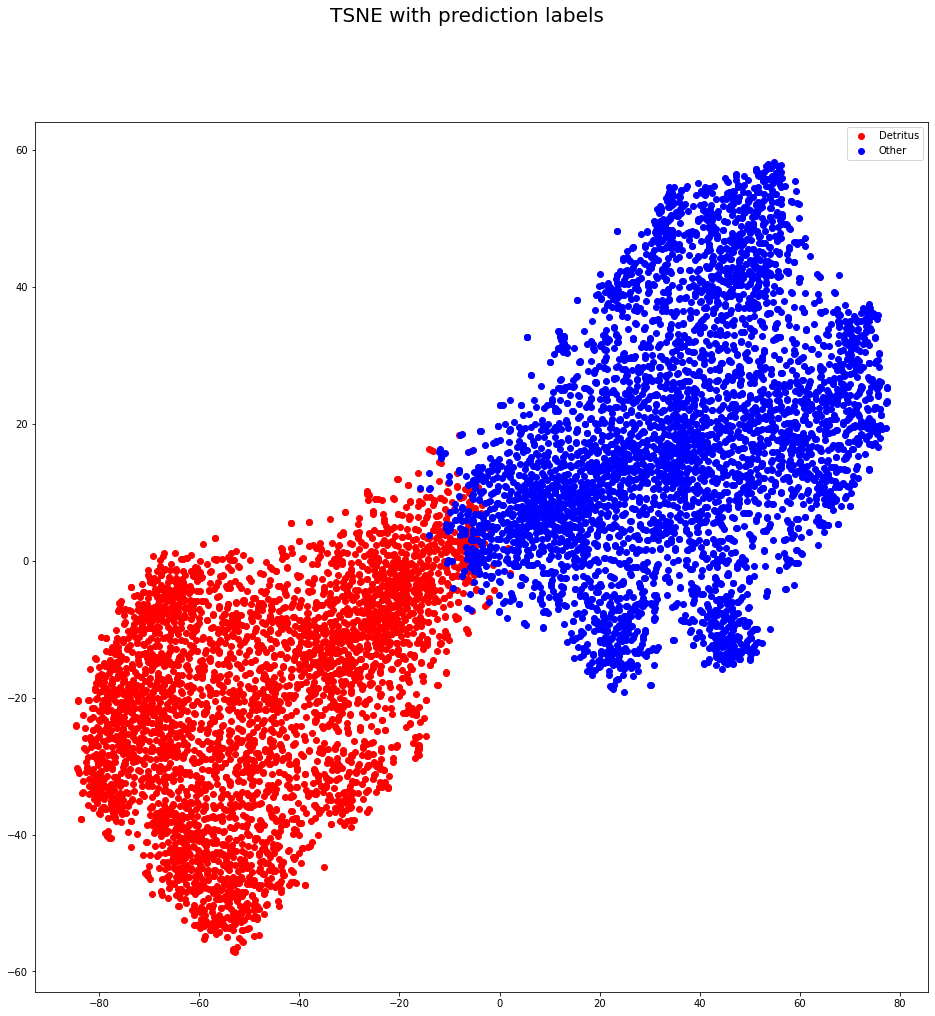

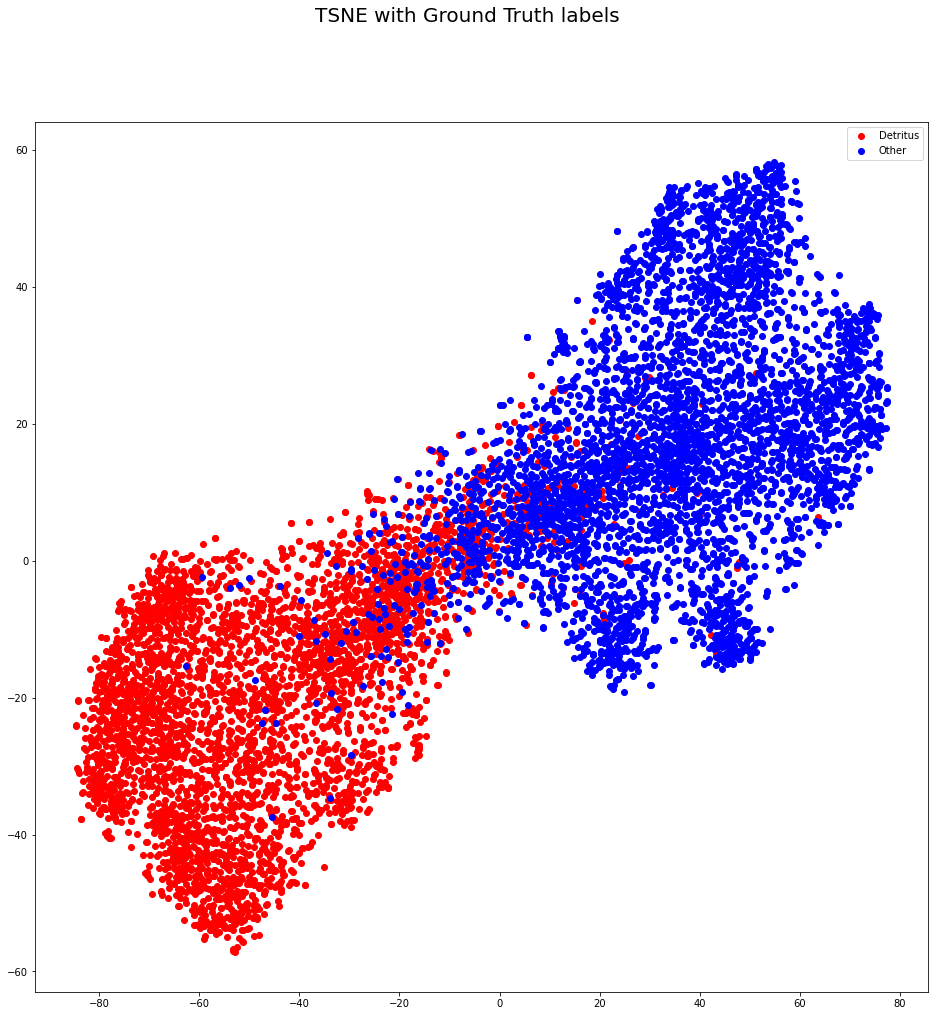

In [8]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.model_a', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

model_A = get_model_A(0.0, True, 0.0)
history = train_model(model_A, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_A, test_dataset)
print_tsne(model_A, test_dataset, 2500)


Training model, epochs:  200
Epoch 1/200
1200/1200 [==============================] - 37s 30ms/step - loss: 0.3520 - accuracy: 0.8341 - val_loss: 0.2986 - val_accuracy: 0.8517
INFO:tensorflow:Assets written to: .model_b/assets
Epoch 2/200
1200/1200 [==============================] - 39s 32ms/step - loss: 0.2613 - accuracy: 0.8842 - val_loss: 0.2631 - val_accuracy: 0.9041
INFO:tensorflow:Assets written to: .model_b/assets
Epoch 3/200
1200/1200 [==============================] - 37s 31ms/step - loss: 0.2392 - accuracy: 0.8982 - val_loss: 0.2322 - val_accuracy: 0.8976
INFO:tensorflow:Assets written to: .model_b/assets
Epoch 4/200
1200/1200 [==============================] - 36s 30ms/step - loss: 0.2215 - accuracy: 0.9066 - val_loss: 0.2174 - val_accuracy: 0.9077
INFO:tensorflow:Assets written to: .model_b/assets
Epoch 5/200
1200/1200 [==============================] - 36s 30ms/step - loss: 0.2077 - accuracy: 0.9138 - val_loss: 0.2254 - val_accuracy: 0.9144
Epoch 6/200
1200/1200 [=========

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1200/1200 [==============================] - 46s 38ms/step - loss: 0.1279 - accuracy: 0.9510 - val_loss: 0.1555 - val_accuracy: 0.9443
INFO:tensorflow:Assets written to: .model_b/assets
Epoch 59/200
1200/1200 [==============================] - 46s 38ms/step - loss: 0.1266 - accuracy: 0.9510 - val_loss: 0.1554 - val_accuracy: 0.9442
INFO:tensorflow:Assets written to: .model_b/assets
Epoch 60/200
1200/1200 [==============================] - 45s 38ms/step - loss: 0.1260 - accuracy: 0.9521 - val_loss: 0.1555 - val_accuracy: 0.9444
Epoch 61/200
1200/1200 [==============================] - 39s 32ms/step - loss: 0.1274 - accuracy: 0.9517 - val_loss: 0.1555 - val_accuracy: 0.9444
Epoch 62/200
1200/1200 [==============================] - 43s 36ms/step - loss: 0.1243 - accuracy: 0.9529 - val_loss: 0.1555 - val_accuracy: 0.9443
Epoch 63/200
1200/1200 [==============================] - 48s 40ms/step - loss: 0.1274 - accuracy: 0.9516 - val_loss: 0.1554 - val_accuracy: 0.9443
Epoch 64/200
 293/1200 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1200/1200 [==============================] - 41s 34ms/step - loss: 0.1258 - accuracy: 0.9512 - val_loss: 0.1554 - val_accuracy: 0.9442
Epoch 78/200
1200/1200 [==============================] - 41s 34ms/step - loss: 0.1261 - accuracy: 0.9517 - val_loss: 0.1554 - val_accuracy: 0.9442
Epoch 79/200
1200/1200 [==============================] - 42s 35ms/step - loss: 0.1260 - accuracy: 0.9524 - val_loss: 0.1554 - val_accuracy: 0.9442

Epoch 00079: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-10.


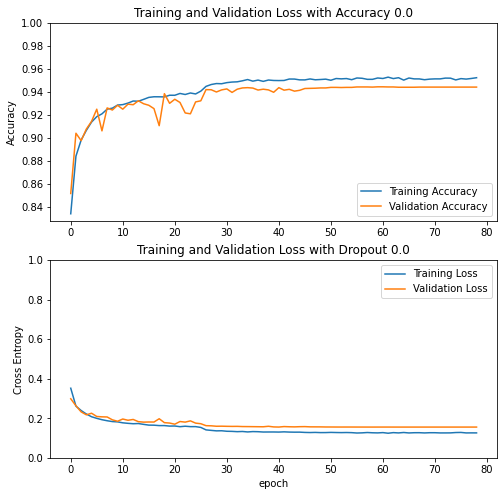

258/258 [==============================] - 6s 23ms/step - loss: 0.1396 - accuracy: 0.9465
Test accuracy : 0.9465175867080688


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 8227 samples in 0.001s...
[t-SNE] Computed neighbors for 8227 samples in 2.305s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8227
[t-SNE] Computed conditional probabilities for sample 2000 / 8227
[t-SNE] Computed conditional probabilities for sample 3000 / 8227
[t-SNE] Computed conditional probabilities for sample 4000 / 8227
[t-SNE] Computed conditional probabilities for sample 5000 / 8227
[t-SNE] Computed conditional probabilities for sample 6000 / 8227
[t-SNE] Computed conditional probabilities for sample 7000 / 8227
[t-SNE] Computed conditional probabilities for sample 8000 / 8227
[t-SNE] Computed conditional probabilities for sample 8227 / 8227
[t-SNE] Mean sigma: 1.977648
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.335182
[t-SNE] KL divergence after 2500 iterations: 1.784884


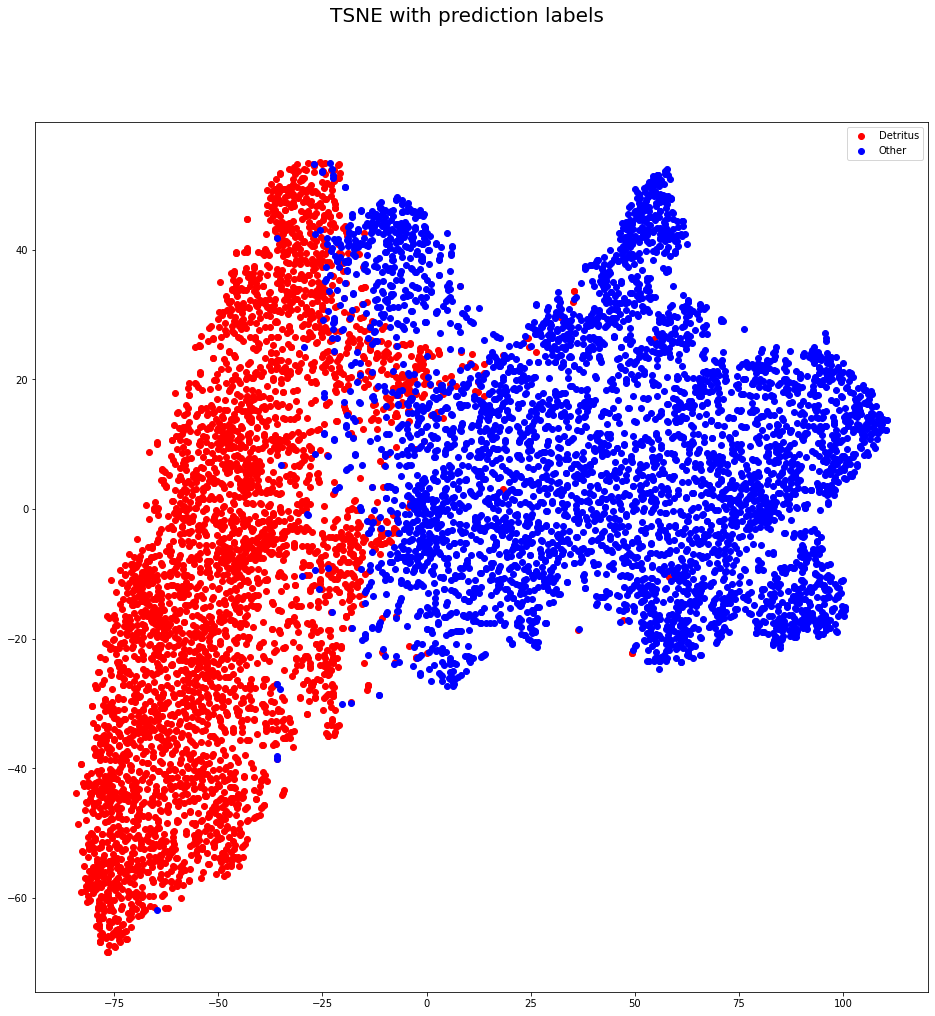

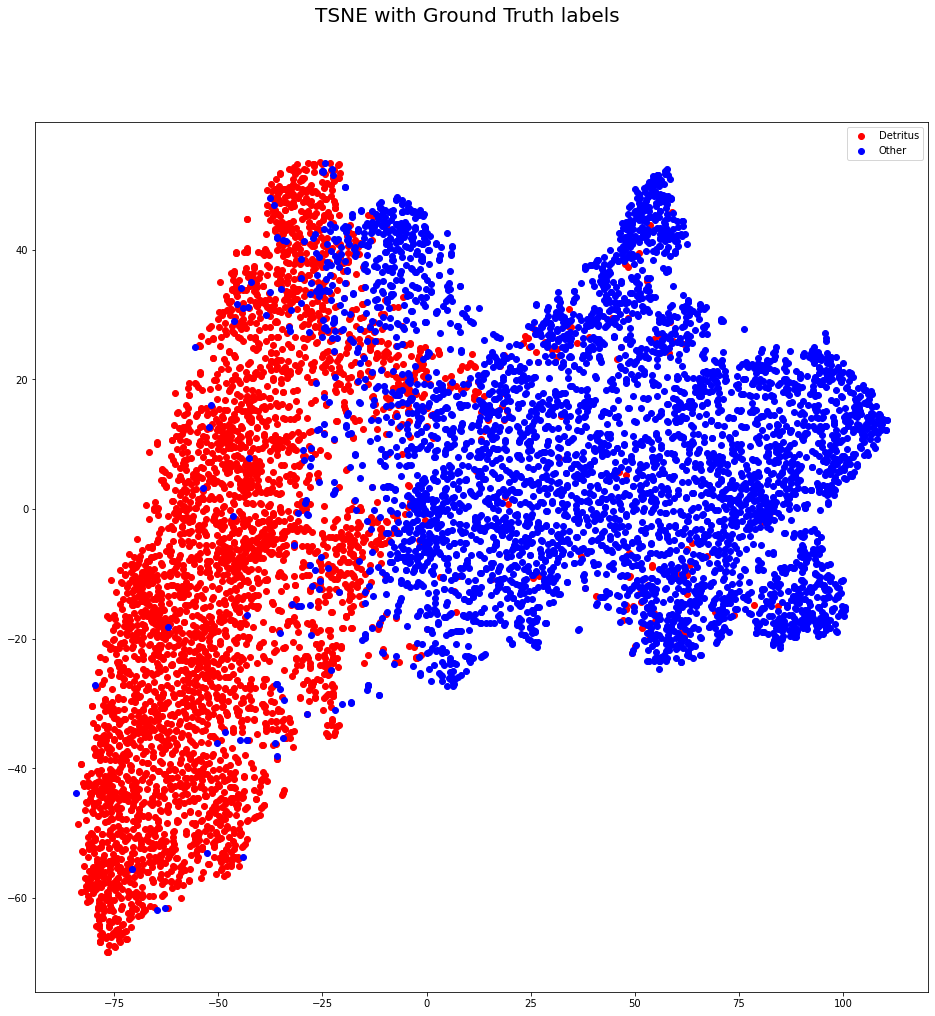

In [9]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.model_b', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

model_B = get_model_B(0.0, True, 0.0)
history = train_model(model_B, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(model_B, test_dataset)
print_tsne(model_B, test_dataset, 2500)


# MobileNetV2 Model From Scratch

In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.mobile_net_scratch', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

base_learning_rate = 0.0001
baseMobile, mobileNetModelSc = get_mobile_net(0.0, True, 0.0)
history = train_model(mobileNetModelSc, TRAINING_EPOCHS, train_dataset, validation_dataset, base_learning_rate, callbacks)
show_plot(history, 0.0)
test_accuracy(mobileNetModelSc, test_dataset)
print_tsne(mobileNetModelSc, test_dataset, 2500)

Training model, epochs:  200
Epoch 1/200
1200/1200 [==============================] - 50s 39ms/step - loss: 0.3441 - accuracy: 0.8339 - val_loss: 0.2603 - val_accuracy: 0.8804


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 2/200
1200/1200 [==============================] - 45s 38ms/step - loss: 0.2425 - accuracy: 0.8950 - val_loss: 0.2374 - val_accuracy: 0.8905


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 3/200
1200/1200 [==============================] - 46s 38ms/step - loss: 0.2228 - accuracy: 0.9048 - val_loss: 0.2251 - val_accuracy: 0.9024


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 4/200
1200/1200 [==============================] - 46s 38ms/step - loss: 0.2137 - accuracy: 0.9090 - val_loss: 0.2198 - val_accuracy: 0.9060


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 5/200
1200/1200 [==============================] - 48s 39ms/step - loss: 0.2070 - accuracy: 0.9140 - val_loss: 0.2165 - val_accuracy: 0.9072


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 6/200
1200/1200 [==============================] - 49s 41ms/step - loss: 0.2053 - accuracy: 0.9145 - val_loss: 0.2129 - val_accuracy: 0.9122


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 7/200
1200/1200 [==============================] - 50s 41ms/step - loss: 0.2018 - accuracy: 0.9169 - val_loss: 0.2107 - val_accuracy: 0.9116


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 8/200
1200/1200 [==============================] - 48s 40ms/step - loss: 0.1982 - accuracy: 0.9181 - val_loss: 0.2095 - val_accuracy: 0.9133


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 9/200
1200/1200 [==============================] - 47s 39ms/step - loss: 0.1981 - accuracy: 0.9181 - val_loss: 0.2081 - val_accuracy: 0.9133


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 10/200
1200/1200 [==============================] - 49s 40ms/step - loss: 0.1947 - accuracy: 0.9201 - val_loss: 0.2061 - val_accuracy: 0.9144


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 11/200
1200/1200 [==============================] - 49s 41ms/step - loss: 0.1928 - accuracy: 0.9222 - val_loss: 0.2058 - val_accuracy: 0.9145


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 12/200
1200/1200 [==============================] - 53s 44ms/step - loss: 0.1922 - accuracy: 0.9208 - val_loss: 0.2044 - val_accuracy: 0.9167


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 13/200
1200/1200 [==============================] - 56s 46ms/step - loss: 0.1903 - accuracy: 0.9219 - val_loss: 0.2037 - val_accuracy: 0.9159


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 14/200
1200/1200 [==============================] - 50s 41ms/step - loss: 0.1903 - accuracy: 0.9229 - val_loss: 0.2032 - val_accuracy: 0.9162


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 15/200
1200/1200 [==============================] - 51s 42ms/step - loss: 0.1889 - accuracy: 0.9210 - val_loss: 0.2022 - val_accuracy: 0.9164


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 16/200
1200/1200 [==============================] - 48s 40ms/step - loss: 0.1892 - accuracy: 0.9218 - val_loss: 0.2005 - val_accuracy: 0.9172


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 17/200
1200/1200 [==============================] - 49s 40ms/step - loss: 0.1879 - accuracy: 0.9229 - val_loss: 0.2010 - val_accuracy: 0.9158
Epoch 18/200
1200/1200 [==============================] - 50s 42ms/step - loss: 0.1857 - accuracy: 0.9229 - val_loss: 0.1999 - val_accuracy: 0.9181


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 19/200
1200/1200 [==============================] - 46s 38ms/step - loss: 0.1865 - accuracy: 0.9250 - val_loss: 0.1997 - val_accuracy: 0.9166


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 20/200
1200/1200 [==============================] - 48s 40ms/step - loss: 0.1865 - accuracy: 0.9239 - val_loss: 0.1998 - val_accuracy: 0.9153
Epoch 21/200
1200/1200 [==============================] - 50s 41ms/step - loss: 0.1861 - accuracy: 0.9233 - val_loss: 0.1987 - val_accuracy: 0.9184


/home/dmansilla/anaconda3/envs/python37/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: .mobile_net_scratch/assets
Epoch 22/200
 121/1200 [==>...........................] - ETA: 36s - loss: 0.1930 - accuracy: 0.9220

# DenseNet model

In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.dense_net_ft', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-5, mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

def do_transfer_learning(drop_value=0.0, data_aug=False, l2_reg=0.0, input_model=None, base_model=None):
    dense_model = input_model
    dense_base_model = base_model
    if (input_model is None):
        dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

        dense_base_model.trainable = False

        dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
        dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
        dense_prediction_layer = tf.keras.layers.Dense(1)

        dense_inputs = tf.keras.Input(shape=(160, 160, 3))
        if data_aug:
            dag = data_augmentation(dense_inputs)
            dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
        else:
            dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
        dense_x = dense_base_model(dense_x, training=False)
        dense_x = dense_global_average_layer(dense_x)
        if drop_value > 0:
            dense_x = keras.layers.Dropout(drop_value)(dense_x)
        dense_outputs = dense_prediction_layer(dense_x)
        dense_model = tf.keras.Model(dense_inputs, dense_outputs)

    dense_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    dense_history = dense_model.fit(train_dataset,
                    epochs=TRAINING_EPOCHS,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
    
    acc = dense_history.history['accuracy']
    val_acc = dense_history.history['val_accuracy']

    loss = dense_history.history['loss']
    val_loss = dense_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title("Training and Validation Accuracy with Dropout {0}".format(drop_value))

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title("Training and Validation Loss with Dropout {0}".format(drop_value))
    plt.xlabel('epoch')
    plt.show()
    
    dense_base_model.trainable = True
    
    dense_fine_tune_at = 660
    
    for layer in dense_base_model.layers[:dense_fine_tune_at]:
        layer.trainable =  False
        
    dense_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
    
    total_epochs =  TRAINING_EPOCHS + TRAINING_EPOCHS

    dense_history_fine = dense_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=dense_history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=callbacks)
    
    acc += dense_history_fine.history['accuracy']
    val_acc += dense_history_fine.history['val_accuracy']

    loss += dense_history_fine.history['loss']
    val_loss += dense_history_fine.history['val_loss']
    
    loss, accuracy = dense_model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    
    show_plot(acc, val_acc, loss, val_loss)

    print_tsne(dense_model, test_dataset)

In [ ]:
def get_dense_net(drop_value=0.0, data_aug=False, l2_reg=0.0):
    dense_base_model = tf.keras.applications.DenseNet201(input_shape=IMG_SHAPE,
                                                   include_top=False,
                                                   weights='imagenet')

    dense_base_model.trainable = False

    dense_preprocess_input = tf.keras.applications.densenet.preprocess_input
    dense_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    dense_prediction_layer = tf.keras.layers.Dense(1)

    dense_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(dense_inputs)
        dense_x =  tf.keras.applications.densenet.preprocess_input(dag)
    else:
        dense_x =  tf.keras.applications.densenet.preprocess_input(dense_inputs)
    dense_x = dense_base_model(dense_x, training=False)
    dense_x = dense_global_average_layer(dense_x)
    if drop_value > 0:
        dense_x = keras.layers.Dropout(drop_value)(dense_x)
    dense_outputs = dense_prediction_layer(dense_x)
    dense_model = tf.keras.Model(dense_inputs, dense_outputs)
    return dense_base_model, dense_model

In [ ]:
base_dense_model, denseNetModel = get_dense_net(0.0, True, 0.0)
do_transfer_learning(0.0, True, 0.0, denseNetModel, base_dense_model)

In [ ]:
import os
from shutil import copyfile

def get_class_name(subdir):
    return subdir[subdir[:subdir.rfind("/")].rfind("/")+1:subdir.rfind('/')]

def get_file_name(subdir):
    return subdir[subdir.rfind('/')+1:]

def copy_results(files, tenancy, result):
    for file in files:
        class_name = get_class_name(file)
        file_name = get_file_name(file)
          
        if not os.path.exists(os.path.join(os.getcwd(), final_dir)):
            os.makedirs(os.path.join(os.getcwd(), final_dir), exist_ok=True)
        copyfile(file, final_dir + "/"+file_name)
    
def process_results(correct_files, incorrect_files, tenancy):
    copy_results(correct_files, tenancy, "correct")
    copy_results(incorrect_files, tenancy, "incorrect")

# Inception Resnet V2 Fine Tuning 

In [ ]:
mcp_save = tf.keras.callbacks.ModelCheckpoint('.inception_resnet_v2', save_best_only=True, monitor='val_loss', mode='min')
reduce_lr_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, min_delta=1e-5, mode='min')
callbacks = [mcp_save, early_stopping, reduce_lr_loss]

def do_transfer_learning(drop_value=0.0, data_aug=False, l2_reg=0.0):
    inception_resnet_base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

    inception_resnet_base_model.trainable = False

    ir_preprocess_input = tf.keras.applications.inception_resnet_v2.preprocess_input
    ir_global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
    ir_prediction_layer = tf.keras.layers.Dense(1)

    ir_inputs = tf.keras.Input(shape=(160, 160, 3))
    if data_aug:
        dag = data_augmentation(ir_inputs)
        ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(dag)
    else:
        ir_x =  tf.keras.applications.inception_resnet_v2.preprocess_input(ir_inputs)
    ir_x = inception_resnet_base_model(ir_x, training=False)
    ir_x = ir_global_average_layer(ir_x)
    if drop_value > 0:
        ir_x = keras.layers.Dropout(drop_value)(ir_x)
    ir_outputs = ir_prediction_layer(ir_x)
    ir_model = tf.keras.Model(ir_inputs, ir_outputs)
    
    ir_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    ir_history = ir_model.fit(train_dataset,
                    epochs=TRAINING_EPOCHS,
                    validation_data=validation_dataset,
                    callbacks=callbacks)
    
    acc = ir_history.history['accuracy']
    val_acc = ir_history.history['val_accuracy']

    loss = ir_history.history['loss']
    val_loss = ir_history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title("Training and Validation Accuracy with Dropout {0}".format(drop_value))

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title("Training and Validation Loss with Dropout {0}".format(drop_value))
    plt.xlabel('epoch')
    plt.show()
    
    inception_resnet_base_model.trainable = True
    
    ir_fine_tune_at = 755
    
    for layer in inception_resnet_base_model.layers[:ir_fine_tune_at]:
        layer.trainable =  False
        
    ir_model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])
    
    total_epochs =  TRAINING_EPOCHS + TRAINING_EPOCHS

    ir_history_fine = ir_model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=ir_history.epoch[-1],
                         validation_data=validation_dataset,
                         callbacks=[callback])
    
    acc += ir_history_fine.history['accuracy']
    val_acc += ir_history_fine.history['val_accuracy']

    loss += ir_history_fine.history['loss']
    val_loss += ir_history_fine.history['val_loss']
    
    loss, accuracy = ir_model.evaluate(test_dataset)
    print('Test accuracy :', accuracy)
    
    show_plot(acc, val_acc, loss, val_loss)
    
    print_tsne(ir_model, test_dataset)
    

In [ ]:
do_transfer_learning(0.0, True, 0.0)